#**First Section

##Importing Libraries

In [1]:
import pickle
import matplotlib
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from random import randint
from imgaug import augmenters
from keras.models import Model
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from numpy import argmax, array_equal
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D

##Data Preprocessing

In [2]:
#read dataset
(train_x, train_y ), (test_x, test_y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print('train_x size :',train_x.shape)
print('train_y size :',train_y.shape)

print('test_x size :',test_x.shape)
print('test_y size :',test_y.shape)

train_x size : (60000, 28, 28)
train_y size : (60000,)
test_x size : (10000, 28, 28)
test_y size : (10000,)


In [4]:
#reshape dataset to have a single channel
train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
test_x =  test_x.reshape((test_x.shape[0], 28, 28, 1))
print('--------------------Dataset is reshaped')

#convert from integer to float
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
print('--------------------Dataset is converted to float')

#normalize to range 0-1
train_x /= 255.0
test_x /= 255.0
print('--------------------Dataset is normalized')

--------------------Dataset is reshaped
--------------------Dataset is converted to float
--------------------Dataset is normalized


In [5]:
#split into train and validation set
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)

In [6]:
#reshape the inputs
train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

In [7]:
print('train_x size :',train_x.shape)
print('val_x size :',val_x.shape)

train_x size : (48000, 784)
val_x size : (12000, 784)


##Creating Autoencoder

In [8]:
#input layer
input_layer = Input(shape=(784,))

#encoding layer
encode_layer1 = Dense(2000, activation='relu')(input_layer)
encode_layer2 = Dense(1200, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

## latent view
latent_view   = Dense(10, activation='sigmoid')(encode_layer3)

#decoding layer
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1200, activation='relu')(decode_layer1)
decode_layer3 = Dense(2000, activation='relu')(decode_layer2)

#output layer
output_layer  = Dense(784)(decode_layer3)

model = Model(input_layer, output_layer)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 2000)              1570000   
_________________________________________________________________
dense_1 (Dense)              (None, 1200)              2401200   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               600500    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
_________________________________________________________________
dense_4 (Dense)              (None, 500)               5500      
_________________________________________________________________
dense_5 (Dense)              (None, 1200)              601200

###traing the model

In [9]:
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(train_x, train_x, epochs=20, batch_size=2048, validation_data=(val_x, val_x), callbacks=[early_stopping])

Epoch 1/20
24/24 [==============================] - 29s 1s/step - loss: 0.1185 - val_loss: 0.0660
Epoch 2/20
24/24 [==============================] - 28s 1s/step - loss: 0.0633 - val_loss: 0.0509
Epoch 3/20
24/24 [==============================] - 28s 1s/step - loss: 0.0482 - val_loss: 0.0413
Epoch 4/20
24/24 [==============================] - 28s 1s/step - loss: 0.0398 - val_loss: 0.0376
Epoch 5/20
24/24 [==============================] - 27s 1s/step - loss: 0.0367 - val_loss: 0.0350
Epoch 6/20
24/24 [==============================] - 27s 1s/step - loss: 0.0342 - val_loss: 0.0311
Epoch 7/20
24/24 [==============================] - 28s 1s/step - loss: 0.0307 - val_loss: 0.0289
Epoch 8/20
24/24 [==============================] - 29s 1s/step - loss: 0.0282 - val_loss: 0.0261
Epoch 9/20
24/24 [==============================] - 29s 1s/step - loss: 0.0256 - val_loss: 0.0248
Epoch 10/20
24/24 [==============================] - 28s 1s/step - loss: 0.0245 - val_loss: 0.0238
Epoch 11/20
24/24 [

##Generating Prediction

###Actual Image

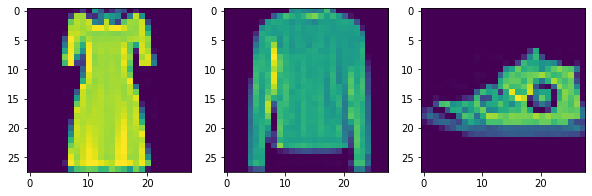

In [10]:
from PIL import Image 
f, ax = plt.subplots(1,3)
f.set_size_inches(10, 10)
for i in range(3):
    ax[i].imshow(val_x[i].reshape(28, 28))
plt.show()

###Predicted Image

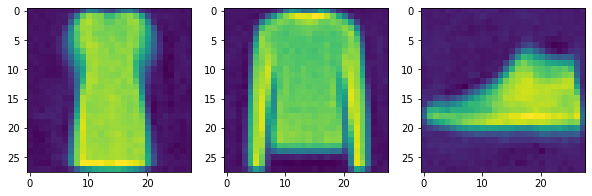

In [11]:
preds = model.predict(val_x)

f, ax = plt.subplots(1,3)
f.set_size_inches(10, 10)
for i in range(3):
    ax[i].imshow(preds[i].reshape(28, 28))
plt.show()

#**Second Section

##Please Open The "Second Section" Jupyter File For Running The Second Part
####Note that for solving the second question we have to use tf.contrib.layers and this madjule only works on tensorflow 1.14

#**Third Section

##Dataset Preprocessing

In [12]:
#read dataset
(train_x, train_y ), (test_x, test_y) = fashion_mnist.load_data()

In [13]:
#split into train and validation
train_x, val_x = train_test_split(train_x, test_size=0.2)

#normalize
train_x = train_x/255.
val_x = val_x/255.

In [14]:
print('train_x size :',train_x.shape)
print('val_x size :',val_x.shape)

train_x size : (48000, 28, 28)
val_x size : (12000, 28, 28)


In [15]:
#reshape to 28*28 format
train_x = train_x.reshape(-1, 28, 28, 1)
val_x = val_x.reshape(-1, 28, 28, 1)

In [16]:
print('train_x size :',train_x.shape)
print('val_x size :',val_x.shape)

train_x size : (48000, 28, 28, 1)
val_x size : (12000, 28, 28, 1)


##Adding Noise (Salt and Pepper)

In [17]:
noise = augmenters.SaltAndPepper(0.1)
seq_object = augmenters.Sequential([noise])

train_x_n = seq_object.augment_images(train_x * 255) / 255
val_x_n = seq_object.augment_images(val_x * 255) / 255

###Sample befor adding noise

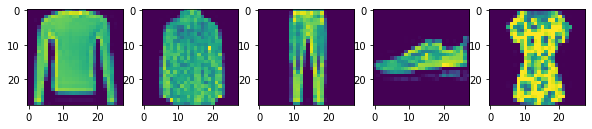

In [18]:
f, ax = plt.subplots(1,5)
f.set_size_inches(10, 10)
for i in range(5,10):
    ax[i-5].imshow(train_x[i].reshape(28, 28))
plt.show()

###Sample after adding noise

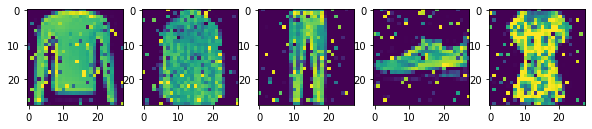

In [19]:
f, ax = plt.subplots(1,5)
f.set_size_inches(10, 10)
for i in range(5,10):
    ax[i-5].imshow(train_x_n[i].reshape(28, 28))
plt.show()

##Creating Autoencoder

In [20]:
#input layer
input_layer = Input(shape=(28, 28, 1))

#encoding layer
encoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer1 = MaxPool2D( (2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = MaxPool2D( (2, 2), padding='same')(encoded_layer2)
encoded_layer3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2)
latent_view    = MaxPool2D( (2, 2), padding='same')(encoded_layer3)

#decoding layer
decoded_layer1 = Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = Conv2D(64, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = UpSampling2D((2, 2))(decoded_layer3)
output_layer   = Conv2D(1, (3, 3), padding='same')(decoded_layer3)

#compile
model_2 = Model(input_layer, output_layer)
model_2.compile(optimizer='adam', loss='mse')

#summary
model_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0   

###training the model

In [21]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=5, mode='auto')
history = model_2.fit(train_x_n, train_x, epochs=10, batch_size=2048, validation_data=(val_x_n, val_x), callbacks=[early_stopping])

Epoch 1/10
24/24 [==============================] - 205s 9s/step - loss: 0.1270 - val_loss: 0.0557
Epoch 2/10
24/24 [==============================] - 208s 9s/step - loss: 0.0520 - val_loss: 0.0391
Epoch 3/10
24/24 [==============================] - 205s 9s/step - loss: 0.0372 - val_loss: 0.0321
Epoch 4/10
24/24 [==============================] - 205s 9s/step - loss: 0.0311 - val_loss: 0.0281
Epoch 5/10
24/24 [==============================] - 204s 9s/step - loss: 0.0276 - val_loss: 0.0256
Epoch 6/10
24/24 [==============================] - 208s 9s/step - loss: 0.0252 - val_loss: 0.0240
Epoch 7/10
24/24 [==============================] - 206s 9s/step - loss: 0.0238 - val_loss: 0.0228
Epoch 8/10
24/24 [==============================] - 204s 9s/step - loss: 0.0227 - val_loss: 0.0225
Epoch 9/10
24/24 [==============================] - 204s 9s/step - loss: 0.0223 - val_loss: 0.0214
Epoch 10/10
24/24 [==============================] - 206s 9s/step - loss: 0.0214 - val_loss: 0.0209


##Predicting

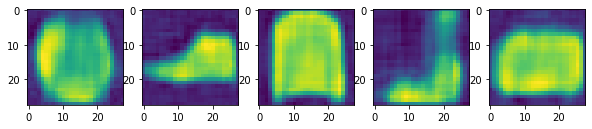

In [22]:
preds = model_2.predict(val_x_n[:10])
f, ax = plt.subplots(1,5)
f.set_size_inches(10, 10)
for i in range(5,10):
    ax[i-5].imshow(preds[i].reshape(28, 28))
plt.show()

#**Forth Section

##Dataset preparation

In [23]:
def dataset_preparation(n_in, n_out, n_unique, n_samples):
    X1, X2, y = [], [], []
    for _ in range(n_samples):
        #random numbers sequence - input 
        inp_seq = [randint(1, n_unique-1) for _ in range(n_in)]
        
        #target sequence
        target = inp_seq[:n_out]
    
        #padded sequence / seed sequence 
        target_seq = list(reversed(target))
        seed_seq = [0] + target_seq[:-1]  
        
        #convert the elements to categorical(keras api)
        X1.append(to_categorical([inp_seq], num_classes=n_unique))
        X2.append(to_categorical([seed_seq], num_classes=n_unique))
        y.append(to_categorical([target_seq], num_classes=n_unique))
    
    #remove unnecessary dimention
    X1 = np.squeeze(np.array(X1), axis=1) 
    X2 = np.squeeze(np.array(X2), axis=1) 
    y  = np.squeeze(np.array(y), axis=1) 
    return X1, X2, y

samples = 100000
features = 51
inp_size = 6
out_size = 3

inputs, seeds, outputs = dataset_preparation(inp_size, out_size, features, samples)
print("Shapes: ", inputs.shape, seeds.shape, outputs.shape)
print ("first categorically encoded input sequence looks like: ", )
inputs[0][0]

Shapes:  (100000, 6, 51) (100000, 3, 51) (100000, 3, 51)
first categorically encoded input sequence looks like: 


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

##Creating Autoencoder

In [24]:
def define_models(n_input, n_output):
    #encoder architecture -> I=sequence - O=encoder states 
    encoder_inputs = Input(shape=(None, n_input))
    encoder = LSTM(128, return_state=True)
    encoder_outputs, state_h, state_c = encoder(encoder_inputs)
    encoder_states = [state_h, state_c]

    #encoder-decoder architecture -> I=seed sequence - O=decoder states, decoded output 
    decoder_inputs = Input(shape=(None, n_output))
    decoder_lstm = LSTM(128, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
    decoder_dense = Dense(n_output, activation='softmax')
    decoder_outputs = decoder_dense(decoder_outputs)
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
    
    #decoder model -> I=current states + encoded sequence - O=decoded sequence
    encoder_model = Model(encoder_inputs, encoder_states)
    decoder_state_input_h = Input(shape=(128,))
    decoder_state_input_c = Input(shape=(128,))
    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
    decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
    decoder_states = [state_h, state_c]
    decoder_outputs = decoder_dense(decoder_outputs)
    decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

    return model, encoder_model, decoder_model

autoencoder, encoder_model, decoder_model = define_models(features, features)

In [25]:
encoder_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None, 51)]        0         
_________________________________________________________________
lstm (LSTM)                  [(None, 128), (None, 128) 92160     
Total params: 92,160
Trainable params: 92,160
Non-trainable params: 0
_________________________________________________________________


In [26]:
decoder_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, 51)]   0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, None, 128),  92160       input_4[0][0]                    
                                                                 input_5[0][0]              

In [27]:
autoencoder.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, 51)]   0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, None, 51)]   0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 128), (None, 92160       input_3[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, None, 128),  92160       input_4[0][0]                    
                                                                 lstm[0][1]                 

###training the model

In [28]:
autoencoder.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
autoencoder.fit([inputs, seeds], outputs, epochs=1)

3125/3125 [==============================] - 45s 13ms/step - loss: 1.4462 - acc: 0.5525


##Predicting

In [29]:
def reverse_onehot(encoded_seq):
    return [argmax(vector) for vector in encoded_seq]

def predict_sequence(encoder, decoder, sequence):
    output = []
    target_seq = np.array([0.0 for _ in range(features)])
    target_seq = target_seq.reshape(1, 1, features)

    current_state = encoder.predict(sequence)
    for t in range(out_size):
        pred, h, c = decoder.predict([target_seq] + current_state)
        output.append(pred[0, 0, :])
        current_state = [h, c]
        target_seq = pred
    return np.array(output)

In [30]:
for k in range(5):
    X1, X2, y = dataset_preparation(inp_size, out_size, features, 1)
    target = predict_sequence(encoder_model, decoder_model, X1)
    print('\nInput Sequence=%s SeedSequence=%s, PredictedSequence=%s' 
          % (reverse_onehot(X1[0]), reverse_onehot(y[0]), reverse_onehot(target)))


Input Sequence=[35, 16, 43, 17, 16, 44] SeedSequence=[43, 16, 35], PredictedSequence=[43, 16, 35]

Input Sequence=[1, 39, 48, 38, 23, 34] SeedSequence=[48, 39, 1], PredictedSequence=[48, 39, 1]

Input Sequence=[1, 35, 18, 32, 21, 37] SeedSequence=[18, 35, 1], PredictedSequence=[18, 35, 1]

Input Sequence=[16, 42, 11, 40, 45, 8] SeedSequence=[11, 42, 16], PredictedSequence=[11, 42, 16]

Input Sequence=[37, 45, 7, 25, 29, 39] SeedSequence=[7, 45, 37], PredictedSequence=[7, 45, 37]
